Yetersiz veri (303 < 730) mevsimsel dekompozisyon atlanacak.


C:\Users\alpgu\AppData\Local\Temp\ipykernel_16060\3826084029.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Üretim (kWh)'].resample('M').mean()


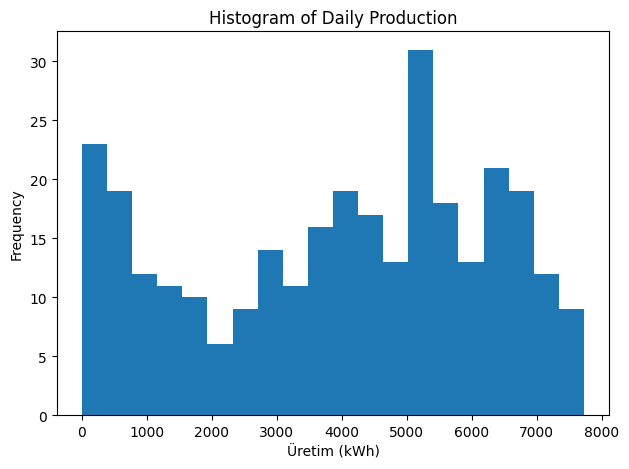

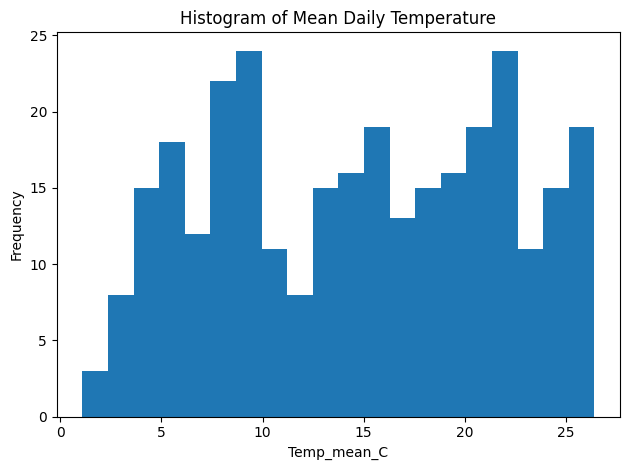

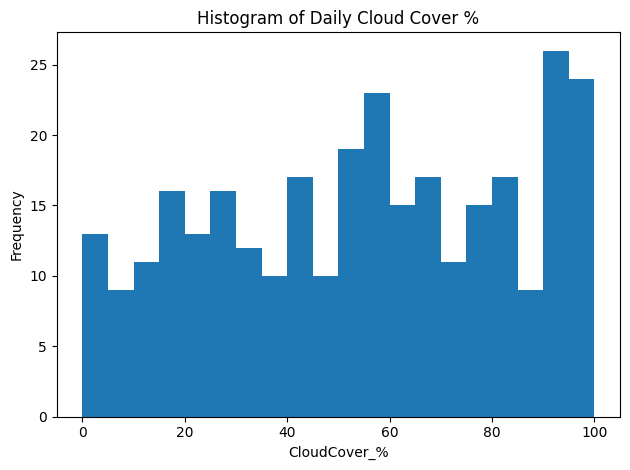

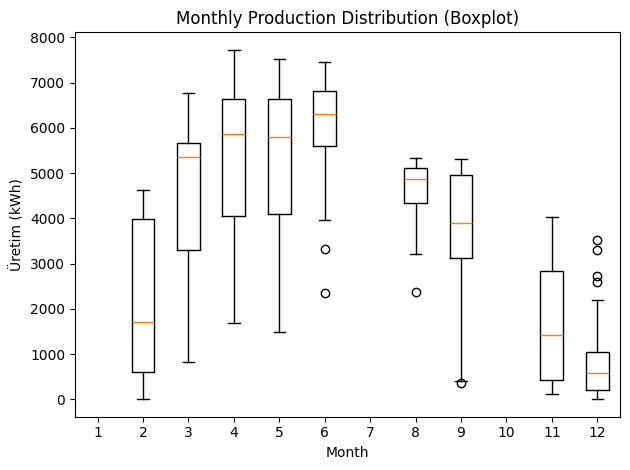

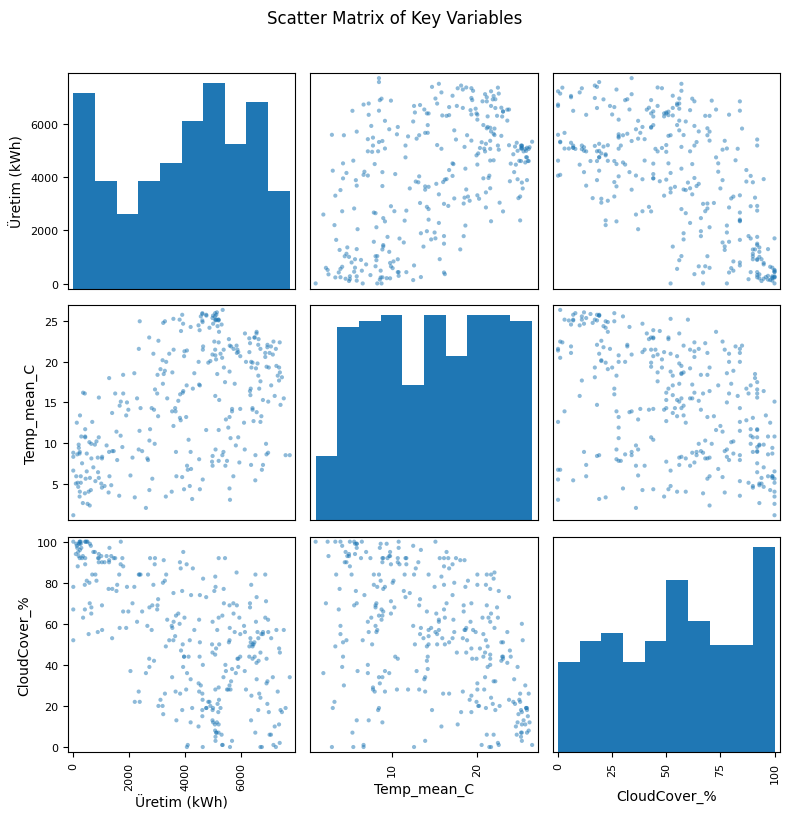

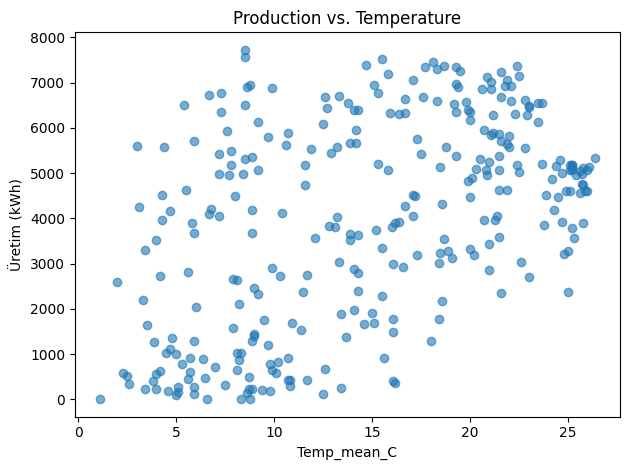

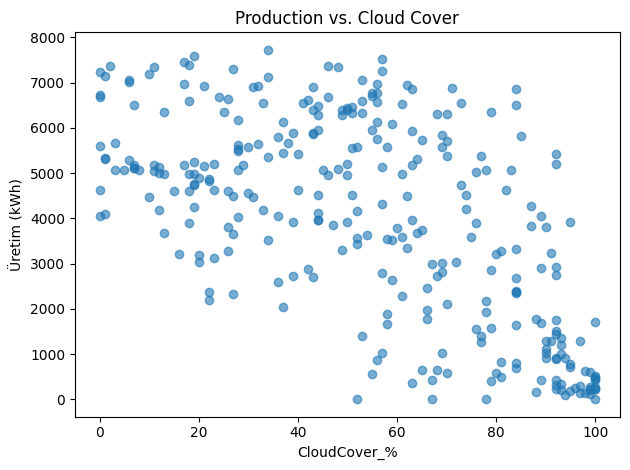

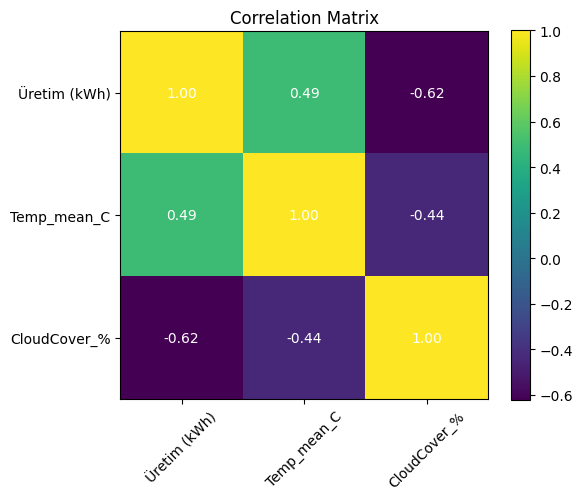

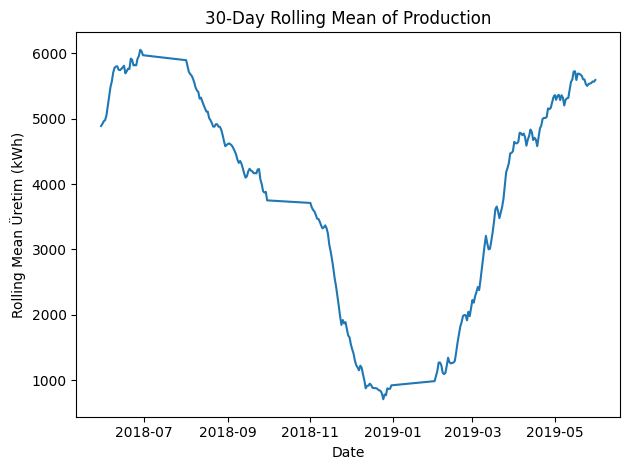

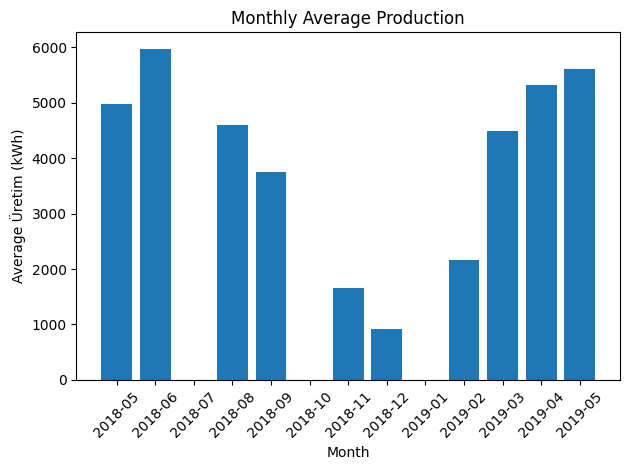

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# statsmodels yoksa mevsimsel dekompozisyonu kontrol etme
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    HAS_SEASONAL = True
except ImportError:
    HAS_SEASONAL = False
    print("statsmodels bulunamadı, mevsimsel dekompozisyon atlanacak.")

# Ayarlar: Excel dosyası yolu
excel_path = r"C:\Users\alpgu\OneDrive\Desktop\DSA PROJECFT\train_data.xlsx"
PERIOD = 365

# 1. Veriyi Yükleme ve Hazırlama
def load_data(path):
    df = pd.read_excel(path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date']).sort_values('Date')
    df.set_index('Date', inplace=True)
    return df

df = load_data(excel_path)

# 2. Temel Korelasyon Hesaplama
corr = df[['Üretim (kWh)', 'Temp_mean_C', 'CloudCover_%']].corr()

# 3. Histogram ve Boxplot Fonksiyonları
def plot_histogram(series, title, xlabel, bins=20):
    plt.figure()
    plt.hist(series.dropna(), bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.tight_layout()

# 4. Grafik Oluşturma
# 4.1 Histograms
titles = [
    ('Üretim (kWh)', 'Histogram of Daily Production'),
    ('Temp_mean_C', 'Histogram of Mean Daily Temperature'),
    ('CloudCover_%', 'Histogram of Daily Cloud Cover %')
]
for col, title in titles:
    plot_histogram(df[col], title, col)

# 4.2 Monthly Boxplot
df['Month'] = df.index.month
plt.figure()
plt.boxplot([df[df['Month']==m]['Üretim (kWh)'].dropna() for m in range(1,13)])
plt.title('Monthly Production Distribution (Boxplot)')
plt.xlabel('Month')
plt.ylabel('Üretim (kWh)')
plt.tight_layout()

# 4.3 Scatter Matrix
df_scatter = df[['Üretim (kWh)', 'Temp_mean_C', 'CloudCover_%']]
scatter_matrix(df_scatter, diagonal='hist', figsize=(8,8))
plt.suptitle('Scatter Matrix of Key Variables', y=1.02)
plt.tight_layout()

# 4.4 Pairwise Scatter Plots
pairs = [
    ('Temp_mean_C', 'Üretim (kWh)', 'Production vs. Temperature'),
    ('CloudCover_%', 'Üretim (kWh)', 'Production vs. Cloud Cover')
]
for xcol, ycol, title in pairs:
    plt.figure()
    plt.scatter(df[xcol], df[ycol], alpha=0.6)
    plt.title(title)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.tight_layout()

# 4.5 Correlation Heatmap
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', cmap='viridis')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='white')
plt.colorbar()
plt.tight_layout()

# 4.6 Time Series Trends
# 30-Day Rolling Mean
rolling_prod = df['Üretim (kWh)'].rolling(window=30).mean()
plt.figure()
plt.plot(rolling_prod.index, rolling_prod.values)
plt.title('30-Day Rolling Mean of Production')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Üretim (kWh)')
plt.tight_layout()

# Monthly Average Bar Chart
monthly_avg = df['Üretim (kWh)'].resample('M').mean()
plt.figure()
plt.bar(monthly_avg.index.strftime('%Y-%m'), monthly_avg.values)
plt.title('Monthly Average Production')
plt.xlabel('Month')
plt.ylabel('Average Üretim (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()

# 4.7 Seasonal Decomposition
if HAS_SEASONAL:
    n_obs = df['Üretim (kWh)'].shape[0]
    required = 2 * PERIOD
    if n_obs >= required:
        result = seasonal_decompose(df['Üretim (kWh)'], model='additive', period=PERIOD)
        fig = result.plot()
        fig.suptitle('Seasonal Decomposition of Production', y=1.02)
    else:
        print(f"Yetersiz veri ({n_obs} < {required}) mevsimsel dekompozisyon atlanacak.")
else:
    print("Mevsimsel dekompozisyon atlandı; statsmodels mevcut değil.")

# 5. Göster
plt.show()
